<a href="https://colab.research.google.com/github/Manvi1718/Pytorch/blob/main/03_PyTorch_Computer_visison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for computer visison

* `torchvision.datasets` - get datasets and data loading functions for computer vision .

* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems .

* `torchvision.transforms` - functions for manipulating your data (images) to be suitable for use with an ML model.

* `torch.utils.data.Datasets` - base dataset class for pytorch

* `torch.utils.data.DataLoader`- Creates a python iterable over dataset.

In [1]:
# Import pytorch
import torch
from torch import nn

# import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1 . getting a dataset

The dataset we are using is FashionMNIST from torchvision.datasets

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download dataset
    train = True ,# do we want the training dataset
    download = True , # do we want to download it ?
    transform = torchvision.transforms.ToTensor(), # how we want to transfrom data?
    target_transform = None # how do we want to transform the labels / targets ?
)

test_data = datasets.FashionMNIST(
    root = "data" ,
    train = False ,
    download = True ,
    transform = ToTensor(),
    target_transform = None
)

In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
# see the first training example
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Chcek the shape
print(f"image shape : {image.shape}")
print(f"image label : {class_names[label]}")

image shape : torch.Size([1, 28, 28])
image label : Ankle boot


## 1.2) Visualizaing our data

image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

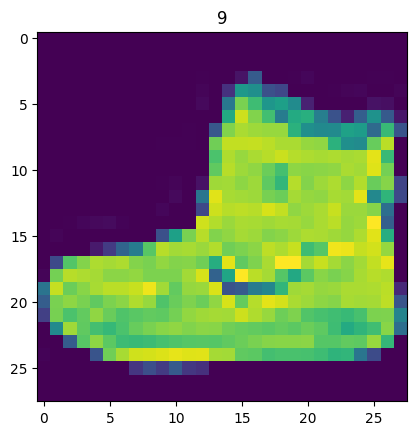

In [9]:
import matplotlib.pyplot as plt
image , label = train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

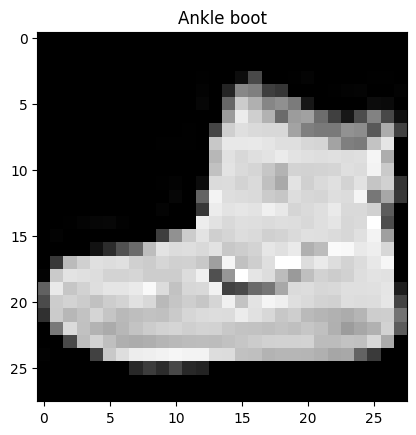

In [10]:
plt.imshow(image.squeeze() , cmap ="gray")
plt.title(class_names[label])

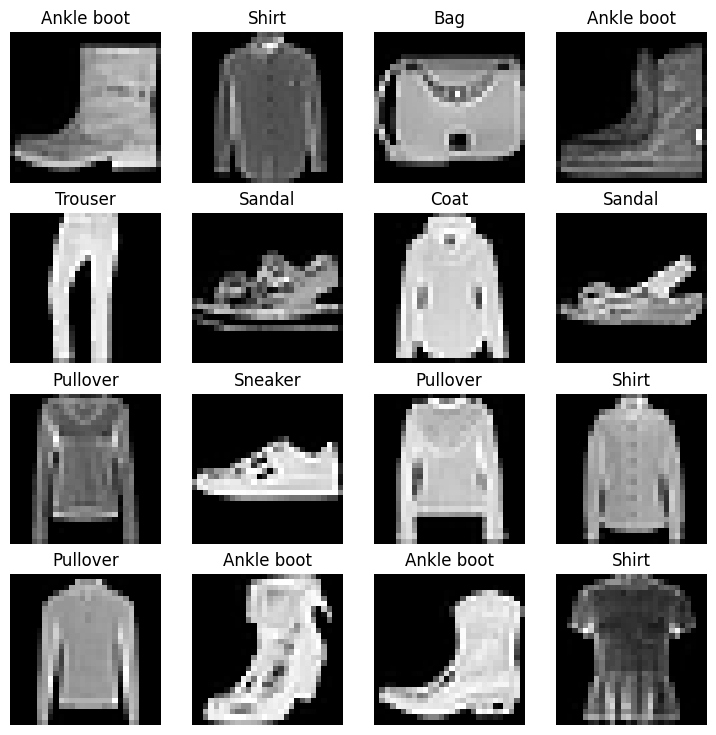

In [11]:
# plot more images
torch.manual_seed(42)
fig =plt.figure(figsize = (9,9))
rows , cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data) , size =[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(rows,cols , i)
  plt.imshow(img.squeeze() ,cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

do you think these itemsn of clothing (images) could be modelled with pure linear lines ? or do you think we will need non linearity ?


In [12]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2) Prepare dataloader

right now our data is in form of pytorch datasets

DataLoader turns our dataset into a python iterable .

more specifically , we want to turn our data into batches (or mini batches)

why should we do this ?

1. it is more computationally efficient , as in , your computing hardware may not be able to look (store in memory) at 6000 images in one hit , so we break it down to 32 images at a time (batch size of 32).
2. it gives our neural netweok more chances to update its gradient per epoch .

In [13]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data ,
                              batch_size = BATCH_SIZE ,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b4e38a236a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b4e38a22fb0>)

In [14]:
# Lets check out what we have created
print(f"dataloaders : {train_dataloader , test_dataloader}")
print(f" length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}....")
print(f" length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}...")

dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x7b4e38a236a0>, <torch.utils.data.dataloader.DataLoader object at 0x7b4e38a22fb0>)
 length of train_dataloader : 1875 batches of 32....
 length of test_dataloader : 313 batches of 32...


In [15]:
# Check out whats inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size : torch.Size([1, 28, 28])
label : 6 , label size : torch.Size([])


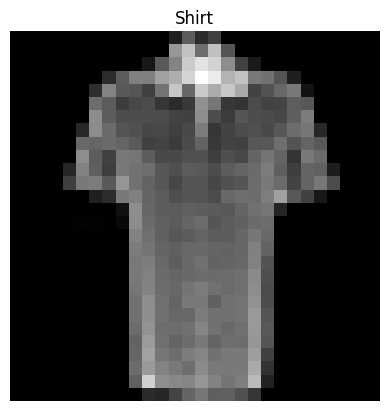

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze() , cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size : {img.shape}")
print(f"label : {label} , label size : {label.shape}")

## 3) Model 0 : Build a baseline model

when starting to build a series of ML modelling experimnets , its best to start with baseline model.

A baseline model is a simple model you will try and improve upone with subsequent models / experiments

In other words: Start simply and add complexity when necessary.

In [17]:
# Creat a flatten model
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x)  # perform forward pass

print(f"Shape before flattening : {x.shape} -> [color_channels , height , width]")
print(f"Shape before flattening : {output.shape} -> [color_channels , height* width]")


Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels , height , width]
Shape before flattening : torch.Size([1, 784]) -> [color_channels , height* width]


In [18]:
output.squeeze().shape

torch.Size([784])

In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int ,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape ,
                  out_features = hidden_units ),
        nn.Linear(in_features = hidden_units ,
                  out_features = output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # 28*28
    hidden_units = 10 , # how many units in hidden layer
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1) Setup loss , optimizer and evaluation metrics

* loss function - in multiclass classification our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()`
* Evaluation metrics - since we are wokring ona classification problem , let us use accuracy as our evaluation metrics

In [23]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions already exist")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f :
    f.write(request.content)

helper_functions already exist


In [24]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2) Creating a function to timeout our experiments

Machine learning is very experimental .

two of main things you will often want to track are
1. Model's performance (loss and accuracy)
2. how fast it runs.

In [25]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device = None):
  """print difference between start and end time """
  total_time = end-start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time

In [26]:
start_time = timer()
# code dcode
end_time = timer()
print_train_time(start=start_time, end = end_time , device="cpu")

Train time on cpu : 0.000 seconds


6.15700000707875e-05

### 3.3) Creating a training loop and training a model on batches of data.

1. Loop through epochs
2. loop through training batches , perform training steps , calculate the train loss *per batch*.
3. Loop through testing batches , perform testing steps , calculate the test loss *per batch*.
4. print whats happening
5. Time it All(for fun).

In [27]:
# import tqdm  for progress bar
from tqdm.auto import tqdm

# set the seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we will keep it small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n---------")
  ### training
  train_loss = 0
  # Add a loop through the training batches
  for batch ,(X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. forward pass
    y_pred = model_0(X)

    #2. calculate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss +=loss # accumulate train loss

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimzier step
    optimizer.step()

    # print whats happening
    if batch % 400 ==0:
      print(f"looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples. ")

  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### TESTING
  test_loss , test_acc =0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. forward pass
      test_pred = model_0(X_test)

      #2. calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred , y_test)

      #3. Accuracy calculation
      test_acc += accuracy_fn(y_true = y_test , y_pred = test_pred.argmax(dim=1))
    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the accuracy average per batch
    test_acc /= len(test_dataloader)

  # print out whats happening
  print(f"\nTrainloss : {train_loss:.4f} | Test loss : {test_loss:.4f} | test acc : {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 =  print_train_time(start = train_time_start_on_cpu,
                                             end = train_time_end_on_cpu,
                                             device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
---------
looked at 0 / 60000 samples. 
looked at 12800 / 60000 samples. 
looked at 25600 / 60000 samples. 
looked at 38400 / 60000 samples. 
looked at 51200 / 60000 samples. 

Trainloss : 0.5904 | Test loss : 0.5095 | test acc : 82.0387
Epoch : 1
---------
looked at 0 / 60000 samples. 
looked at 12800 / 60000 samples. 
looked at 25600 / 60000 samples. 
looked at 38400 / 60000 samples. 
looked at 51200 / 60000 samples. 

Trainloss : 0.4763 | Test loss : 0.4799 | test acc : 83.1969
Epoch : 2
---------
looked at 0 / 60000 samples. 
looked at 12800 / 60000 samples. 
looked at 25600 / 60000 samples. 
looked at 38400 / 60000 samples. 
looked at 51200 / 60000 samples. 

Trainloss : 0.4550 | Test loss : 0.4766 | test acc : 83.4265
Train time on cpu : 39.263 seconds


## 4) Make predictions and get model 0 results

In [28]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn
               ):
  """ Returns a dictionary containing the results of model predicting data loader"""
  loss , acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      # Make predictions
      y_pred = model(X)

      #Accumulate the loss and accuracy per batch
      loss += loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true = y,
                        y_pred = y_pred.argmax(dim=1))
    # Scale the loss and acc to find the average loss/ acc per batch
    loss/= len(data_loader)
    acc/= len(data_loader)

  return {"model_name" : model.__class__.__name__, # only works when model was created with a class
          "model_loss" : loss.item(),
          "model_acc" :acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5) Setup device agnostic code (for GPU access)

In [29]:
torch.cuda.is_available()

True

In [30]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6) Model 1 : build a model with non-linearity

we learned the power of non - linearity.

In [31]:
# Creating a linear and non-linear
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape :int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [32]:
# create a instance of model_1
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape = 784,
                            hidden_units = 10 ,
                            output_shape = len(class_names)
                            ).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 ) Setup loss , optimizer and evaluation metrics

In [33]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### 6.2) Functionizing training and evaluation/testing loops

lets create a function for :
* training loop : `train_step()`
* testing loop : `test_step()`

In [34]:
def train_step(model:torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ performs a training with model trying to learn on data_loader."""
  train_loss,train_acc = 0,0
  # Put model into training mode
  model.train()

  # Add a loop through the training batches
  for batch ,(X,y) in enumerate(data_loader):
    # put data on target device
    X,y= X.to(device) , y.to(device)

    #1. forward pass(outputs ths raw logits)
    y_pred = model(X)

    #2. calculate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss +=loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1)) # go from raw logits -> prediction labels

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimzier step
    optimizer.step()

  # Device total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss : {train_loss:.5f} |Train Acc : {train_acc:.2f}%")

In [35]:
def test_step(model:torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):
  """ performs a testing loop step on model going over data_loader"""
  test_loss , test_acc=0,0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X,y in data_loader:
      # send the data to the target device
      X,y= X.to(device) , y.to(device)

      #1. forward pass
      test_pred = model(X)

      #2. Calculate the loss / acc
      test_loss += loss_fn(test_pred,y)
      test_acc+= accuracy_fn(y_true = y,y_pred = test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}%")

In [36]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n--------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn=accuracy_fn,
            device = device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                              end = train_time_end_on_gpu,
                                              device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------
Train loss : 1.09199 |Train Acc : 61.34%
Test loss : 0.95636 | Test Acc : 65.00%
Epoch : 1
--------
Train loss : 0.78101 |Train Acc : 71.93%
Test loss : 0.72227 | Test Acc : 73.91%
Epoch : 2
--------
Train loss : 0.67027 |Train Acc : 75.94%
Test loss : 0.68500 | Test Acc : 75.02%
Train time on cuda : 31.238 seconds


In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [38]:
total_train_time_model_0

39.263014700999975

In [39]:
total_train_time_model_1

31.238126858999976

> **Note:** Sometimes , depending on your data / hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this ?
>
> 1. It could be that the overhead for copying data/ model to and from GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you are using has abetter CPU in terms of compute capability than CPU.

In [40]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a dictionary containing the results of model predicting data loader"""
  loss , acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      # Make data device agnostic
      X , y = X.to(device) , y.to(device)
      # Make predictions
      y_pred = model(X)

      #Accumulate the loss and accuracy per batch
      loss += loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true = y,
                        y_pred = y_pred.argmax(dim=1))
    # Scale the loss and acc to find the average loss/ acc per batch
    loss/= len(data_loader)
    acc/= len(data_loader)

  return {"model_name" : model.__class__.__name__, # only works when model was created with a class
          "model_loss" : loss.item(),
          "model_acc" :acc}


In [41]:
# get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [42]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2 : Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabillities to find patterns in visual data .

In [43]:
#Create a convolutional neural netwrok
class FashionMNISTModelV2(nn.Module):
  """
  model architecture that replicates TinyVGG
  model fromCNN explainer website.
  """
  def __init__(self,
               input_shape:int,
               hidden_units :int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels =input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding =1), # values we can set ourselves are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units ,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units ,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, # there is a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"Output shape of Conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of Conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of Classifier: {x.shape}")
    return x

In [44]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units = 10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through `nn.Conv2d()`

In [45]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size =(32,3,64,64))
test_image = images[0]
print(f"Image batch of size : {images.shape}")
print(f"Single image shape : {test_image.shape}")
print(f"Test image : \n {test_image}")

Image batch of size : torch.Size([32, 3, 64, 64])
Single image shape : torch.Size([3, 64, 64])
Test image : 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

      

In [46]:
test_image.shape

torch.Size([3, 64, 64])

In [47]:
torch.manual_seed(42)
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = (3,3),
                       stride = 1,
                       padding =1)

# pass the data through the conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output
conv_output.shape

torch.Size([1, 10, 64, 64])

### 7.2) Stepping through `nn.MaxPool2d()`

In [48]:
test_image.shape

torch.Size([3, 64, 64])

In [49]:
# Print out original image shape without unsqueezed dimension
print(f"test image origianl shape : {test_image.shape}")
print(f"test image with unsqueezed dimension : {test_image.unsqueeze(0).shape}")

# create a maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# pass data through just conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer() : {test_image_through_conv.shape}")

# pass the data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer() : {test_image_through_conv_and_max_pool.shape}")

test image origianl shape : torch.Size([3, 64, 64])
test image with unsqueezed dimension : torch.Size([1, 3, 64, 64])
Shape after going through conv_layer() : torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer() : torch.Size([1, 10, 32, 32])


### 7.3) Setup a loss function and optimizer for `model_2`

In [50]:
# Setup loss function/eval metrcs / optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

### 7.4) Training and testing `model_2` using training and testing functions

In [51]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epochs : {epoch}\n ---------------")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model=model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end = train_time_end_model_2,
                                              device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

epochs : 0
 ---------------
Train loss : 0.59215 |Train Acc : 78.47%
Test loss : 0.38673 | Test Acc : 86.33%
epochs : 1
 ---------------
Train loss : 0.36007 |Train Acc : 86.96%
Test loss : 0.35196 | Test Acc : 87.38%
epochs : 2
 ---------------
Train loss : 0.32381 |Train Acc : 88.33%
Test loss : 0.32146 | Test Acc : 88.45%
Train time on cuda : 39.240 seconds


In [52]:
# Get model_2_results
model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3214579224586487,
 'model_acc': 88.44848242811501}

In [53]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Compare model results and training time

In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321458,88.448482


In [55]:
# Adding training time to results comparison
compare_results["training_time"] = ([total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2])
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,39.263015
1,FashionMNISTModelV1,0.685001,75.019968,31.238127
2,FashionMNISTModelV2,0.321458,88.448482,39.240320


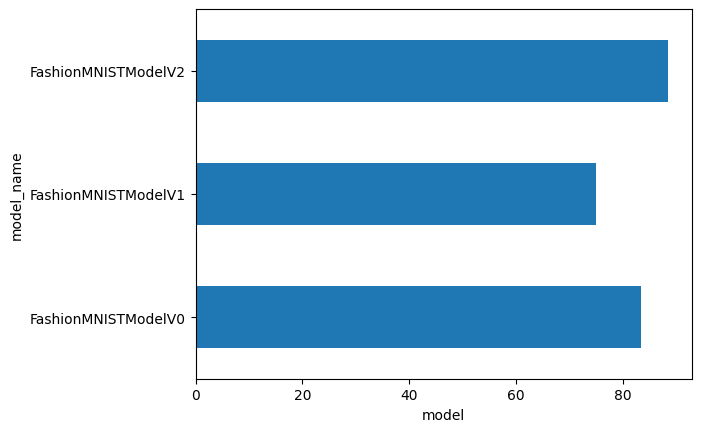

In [56]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.xlabel("model");

## 9) Make and evaluate random predictions with best model

In [57]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device: torch.device = device):
  pred_probs =[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data :
      # prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # forward pass
      pred_logits = model(sample)

      # get prediction probabilities(logits -> prediction probabilities)
      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)

      # get pred_prob off gpu
      pred_probs.append(pred_prob.cpu())

  # stack the pred_prob to turn into a tensor
  return torch.stack(pred_probs)

In [58]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample , label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

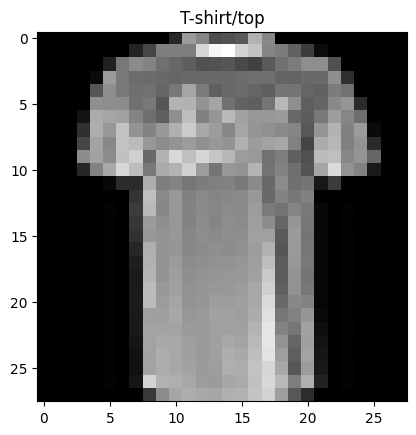

In [59]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [60]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
# view first 2 prediction probabilities
pred_probs[:2]

tensor([[9.9443e-01, 2.2062e-06, 2.7150e-04, 1.8424e-04, 9.1214e-06, 1.8097e-07,
         5.0850e-03, 1.3981e-07, 1.6136e-05, 2.1665e-08],
        [1.2393e-01, 1.2938e-06, 2.7826e-03, 4.4706e-06, 4.2417e-07, 3.5142e-05,
         2.3669e-03, 2.5192e-04, 8.7051e-01, 1.1394e-04]])

In [61]:
# Convert peediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 8, 4, 5, 1, 3, 9, 5, 1])

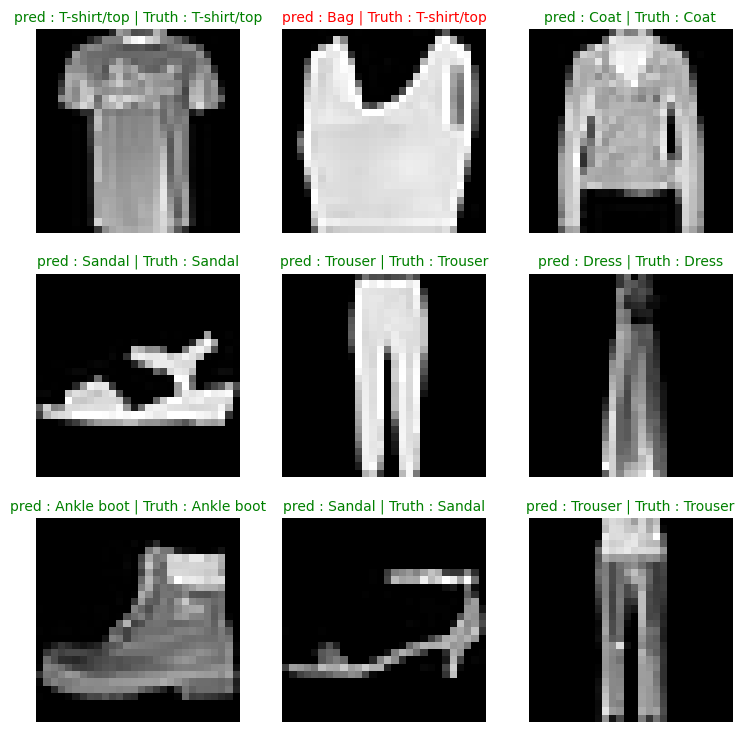

In [62]:
# Plot predictions
plt.figure(figsize = (9,9))
nrows=3
ncols=3
for i , sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows,ncols,i+1)

  # plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # find the prediction (in text form , e.g. "sandal")
  pred_label = class_names[pred_classes[i]]

  # get the truth label (intext form)
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f"pred : {pred_label} | Truth : {truth_label}"

  # Check for equality between pred and truth and change color of text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10, c="g")
  else:
    plt.title(title_text,fontsize = 10,c="r")
  plt.axis(False)


## 10) Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually

1. Make predictions with our trained model on the test dataset
2. make a confusion matrix `torchmetrics.ConfusionMatrix`
3. PLot the confusion matrix using `mletend.plotting.plot_confusion_matrix()`

In [63]:
# Import tqdm.auto
from tqdm.auto import tqdm


# Make predictions with trained model
y_preds =[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc = "Making predictions ....."):
    # send the data to target device
    X , y = X.to(device) , y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    # put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making predictions .....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 0, 1, 4])

In [64]:
len(y_pred_tensor)

10000

In [65]:
# see if required packages are installed and ifnot , install them ..
try:
  import torchmetrics , mlxtend
  print(f",mlxtend version : {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>=19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  print(f"mlxtend version : {mlxtend.__version__}")

,mlxtend version : 0.22.0
mlxtend version : 0.22.0


In [66]:
import mlxtend

In [67]:
mlxtend.__version__

'0.22.0'

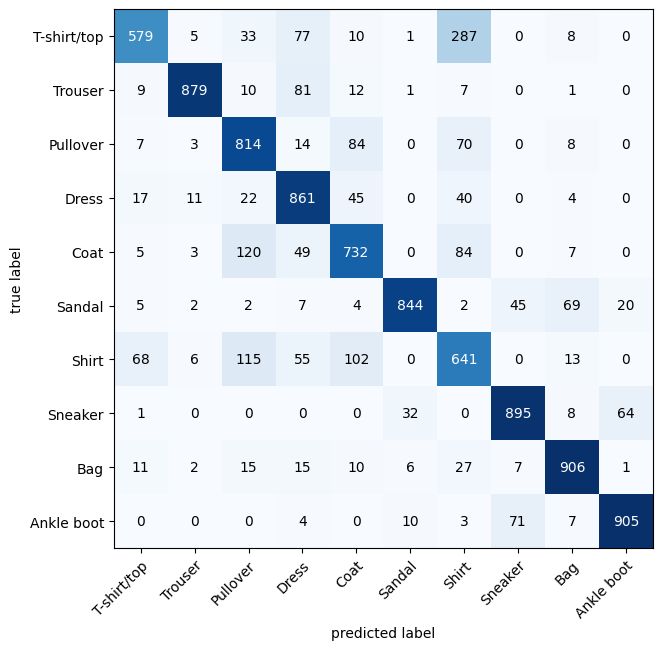

In [69]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task = "multiclass")
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3. plot our confusion matrix
fig , ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize =(10,7)
)

## 11) Save and load best performing model

In [70]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True ,
                 exist_ok = True)

# Create a save model
MODEL_NAME = "03_Pytorch_CV_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to : models/03_Pytorch_CV_model_2.pth


In [71]:
# Ccreate a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape=len(class_names))

# load in the save state dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the loaded model to device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [72]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3214579224586487,
 'model_acc': 88.44848242811501}

In [73]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3214579224586487,
 'model_acc': 88.44848242811501}

In [74]:
# Chekc if model results are clos to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-02)

tensor(True)